In [3]:
import ROOT
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tqdm
ROOT.ROOT.EnableImplicitMT()

if "/home/submit/pdmonte/CMSSW_10_6_27/src/Hrare2023/analysis/func_marti.so" not in ROOT.gSystem.GetLibraries():
    ROOT.gSystem.CompileMacro("/home/submit/pdmonte/CMSSW_10_6_27/src/Hrare2023/analysis/func_marti.cc","k")

if "/home/submit/pdmonte/CMSSW_10_6_27/src/Hrare2023/analysis/functions.so" not in ROOT.gSystem.GetLibraries():
    ROOT.gSystem.CompileMacro("/home/submit/pdmonte/CMSSW_10_6_27/src/Hrare2023/analysis/functions.cc","k")

Info in <ACLiC>: unmodified script has already been compiled and loaded
Info in <ACLiC>: unmodified script has already been compiled and loaded


In [62]:
file = ROOT.TFile("/home/submit/pdmonte/CMSSW_10_6_27/src/Hrare2023/analysis/TMVA_tutorials/multi.root", "READ")
df = ROOT.RDataFrame(file.Get("dataset").Get("TestTree"))
df = (df.Define("HCandMass_GEN", "compute_HiggsVars_var(goodMeson_pt_GEN, goodMeson_eta_GEN, goodMeson_phi_GEN, goodMeson_mass_GEN, goodPhotons_pt_GEN, goodPhotons_eta_GEN, goodPhotons_phi_GEN, 0)")
        .Define("HCandMass_varGEN", "compute_HiggsVars_var(goodMeson_pt_GEN, goodMeson_eta, goodMeson_phi, goodMeson_mass, goodPhotons_pt_GEN, goodPhotons_eta, goodPhotons_phi, 0)")
        .Define("goodMeson_pt_PRED", 'MLP_BFGS.goodMeson_pt_GEN').Define("goodPhotons_pt_PRED", 'MLP_BFGS.goodPhotons_pt_GEN')
        #.Define("goodMeson_pt_PRED", 'PDERS.goodMeson_pt_GEN').Define("goodPhotons_pt_PRED", 'PDERS.goodPhotons_pt_GEN')
        .Define("HCandMass_varPRED", "compute_HiggsVars_var(goodMeson_pt_PRED, goodMeson_eta, goodMeson_phi, goodMeson_mass, goodPhotons_pt_PRED, goodPhotons_eta, goodPhotons_phi, 0)"))

In [63]:
cols = ["goodMeson_pt", "goodMeson_pt_GEN", "goodMeson_pt_PRED", "goodPhotons_pt", "goodPhotons_pt_GEN", "goodPhotons_pt_PRED"]
x = df.AsNumpy(columns=cols)
pddf = pd.DataFrame(x)
display(pddf)

goodMesonDiffReco = pddf["goodMeson_pt"].values - pddf["goodMeson_pt_GEN"].values
goodMesonDiffPred = pddf["goodMeson_pt_PRED"].values - pddf["goodMeson_pt_GEN"].values
print(goodMesonDiffReco)
print(goodMesonDiffPred)
errorMesonReco = np.sqrt(np.mean(goodMesonDiffReco**2))
errorMesonPred = np.sqrt(np.mean(goodMesonDiffPred**2))
print(errorMesonReco, errorMesonPred)

goodPhotonsDiffReco = pddf["goodPhotons_pt"].values - pddf["goodPhotons_pt_GEN"].values
goodPhotonsDiffPred = pddf["goodPhotons_pt_PRED"].values - pddf["goodPhotons_pt_GEN"].values
print(goodPhotonsDiffReco)
print(goodPhotonsDiffPred)
errorPhotonsReco = np.sqrt(np.mean(goodPhotonsDiffReco**2))
errorPhotonsPred = np.sqrt(np.mean(goodPhotonsDiffPred**2))
print(errorPhotonsReco, errorPhotonsPred)

,goodMeson_pt,goodMeson_pt_GEN,goodMeson_pt_PRED,goodPhotons_pt,goodPhotons_pt_GEN,goodPhotons_pt_PRED
0,103.530548,97.748009,107.776077,43.525181,43.500,43.267197
1,45.889603,49.148148,48.580196,90.918251,90.750,91.023857
2,59.700191,58.902760,63.141312,61.964787,62.500,62.202377
3,79.771690,77.903938,82.090508,39.168736,37.625,39.433998
4,73.506218,71.137169,78.429001,53.967331,52.875,53.853813
...,...,...,...,...,...,...
14350,74.323372,73.682037,75.730423,50.113457,50.375,50.416840
14351,58.046505,60.280945,60.969028,49.243237,56.250,49.494801
14352,245.811188,227.873810,253.322922,39.599762,39.500,40.671711
14353,72.468712,75.027809,74.251869,59.918953,60.750,60.537247


[ 5.7825394  -3.258545    0.79743195 ... 17.937378   -2.5590973
 -5.58902   ]
[10.028069   -0.5679512   4.238552   ... 25.449112   -0.77593994
 -3.7087517 ]
11.092224 9.668569
[ 0.02518082  0.16825104 -0.5352135  ...  0.09976196 -0.83104706
 -0.01334381]
[-0.23280334  0.27385712 -0.29762268 ...  1.171711   -0.2127533
  0.7579384 ]
1.6300639 2.731862


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


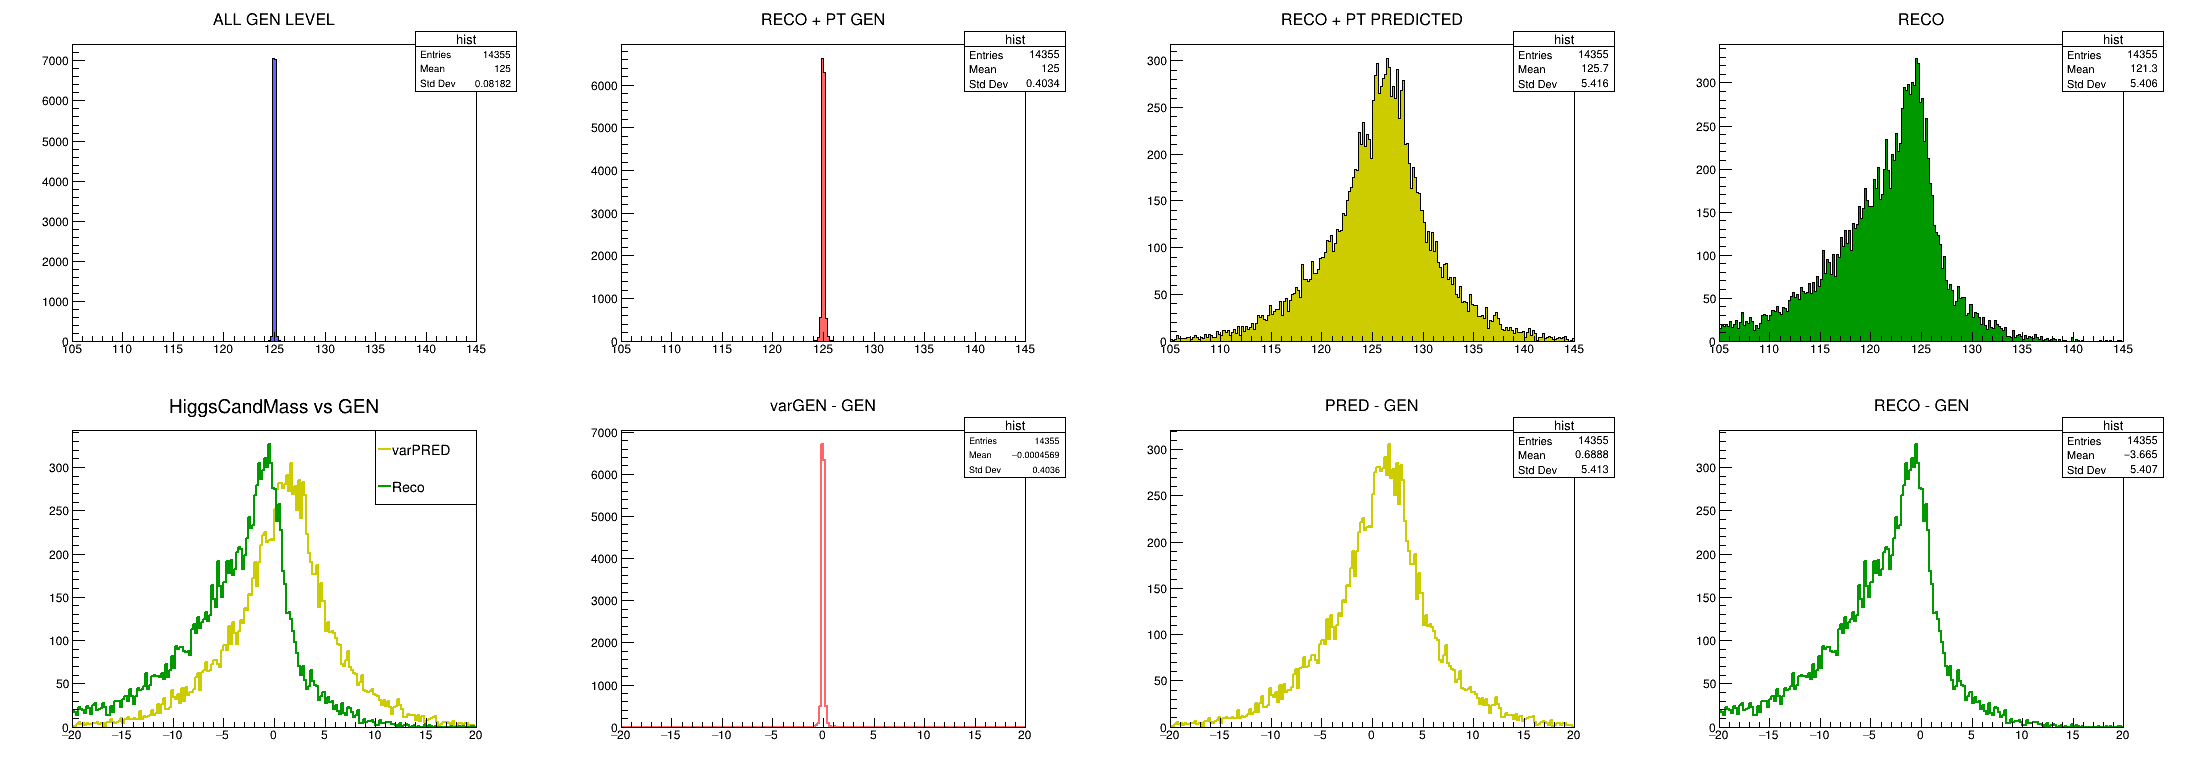

In [65]:
canvas = ROOT.TCanvas("canvas", "canvas", 2200, 800)
canvas.Divide(4, 2)

nbins, xlow, xhigh = 200, 105, 145
xlowdiff, xhighdiff = -20, 20

h1 = df.Histo1D(("hist", "ALL GEN LEVEL", nbins, xlow, xhigh), "HCandMass_GEN")
h2 = df.Histo1D(("hist", "RECO + PT GEN", nbins, xlow, xhigh), "HCandMass_varGEN")
h3 = df.Histo1D(("hist", "RECO + PT PREDICTED", nbins, xlow, xhigh), "HCandMass_varPRED")
h4 = df.Histo1D(("hist", "RECO", nbins, xlow, xhigh), "HCandMass")

h6 = df.Define("good", "HCandMass_varGEN - HCandMass_GEN").Histo1D(("hist", "varGEN - GEN", nbins, xlowdiff, xhighdiff), "good")
h7 = df.Define("good", "HCandMass_varPRED - HCandMass_GEN").Histo1D(("hist", "PRED - GEN", nbins, xlowdiff, xhighdiff), "good")
h8 = df.Define("good", "HCandMass - HCandMass_GEN").Histo1D(("hist", "RECO - GEN", nbins, xlowdiff, xhighdiff), "good")


h1.SetFillColor(ROOT.kBlue-7)
h1.SetLineColor(ROOT.kBlack)
h2.SetFillColor(ROOT.kRed-7)
h2.SetLineColor(ROOT.kBlack)
h3.SetFillColor(ROOT.kYellow+1)
h3.SetLineColor(ROOT.kBlack)
h4.SetFillColor(ROOT.kGreen+2)
h4.SetLineColor(ROOT.kBlack)

h6.SetLineColor(ROOT.kRed-7)
h7.SetLineColor(ROOT.kYellow+1)
h8.SetLineColor(ROOT.kGreen+2)
h6.SetLineWidth(2)
h7.SetLineWidth(2)
h8.SetLineWidth(2)


p = canvas.cd(1)
h1.Draw("hist")
p = canvas.cd(2)
h2.Draw("hist")
p = canvas.cd(3)
h3.Draw("hist")
p = canvas.cd(4)
h4.Draw("hist")

p = canvas.cd(6)
h6.Draw("hist")
p = canvas.cd(7)
h7.Draw("hist")
p = canvas.cd(8)
h8.Draw("hist")
p = canvas.cd(5)
stack = ROOT.THStack("stack", "HiggsCandMass vs GEN")
#stack.Add(h6.GetValue())
stack.Add(h7.GetValue())
stack.Add(h8.GetValue())
stack.Draw("hist nostack")
legend = ROOT.TLegend(0.70, 0.70, 0.9, 0.9)
legend.SetMargin(0.17)
#legend.SetBorderSize(0)
legend.SetTextSize(0.04)
#legend.AddEntry(h6.GetValue(), "varGEN", "l")
legend.AddEntry(h7.GetValue(), "varPRED", "l")
legend.AddEntry(h8.GetValue(), "Reco", "l")
legend.Draw()

canvas.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


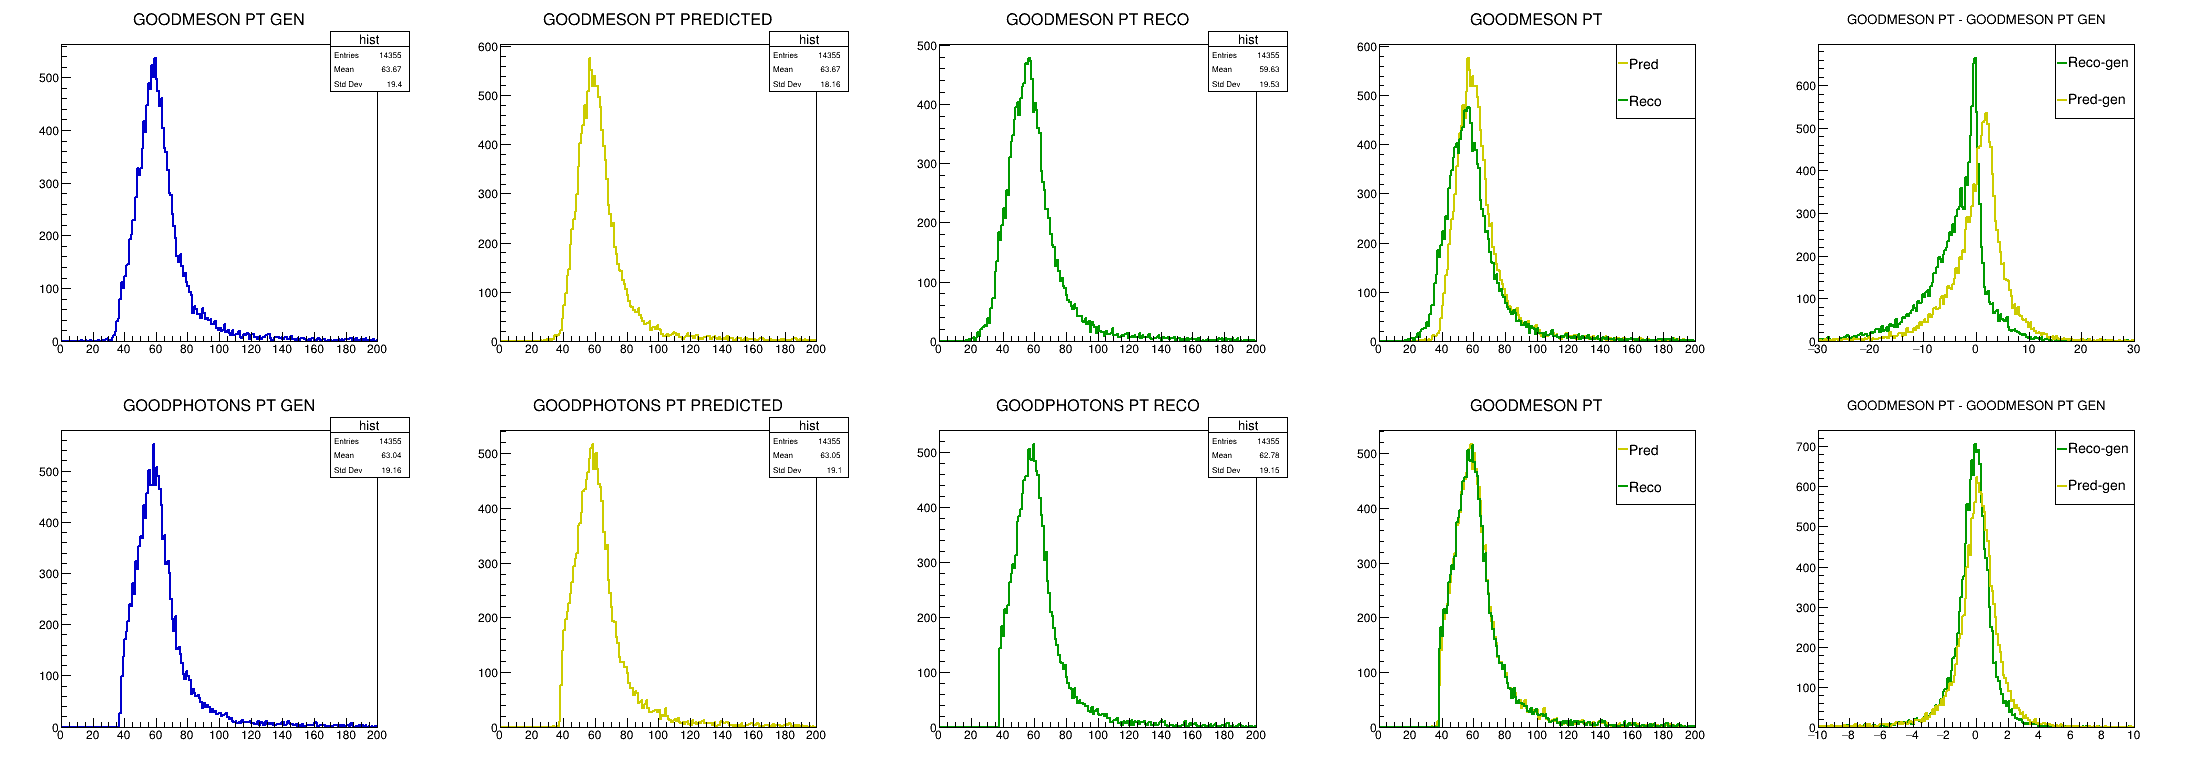

In [66]:
canvas = ROOT.TCanvas("canvas", "canvas", 2200, 800)
canvas.Divide(5, 2)

nbins, xlow, xhigh = 200, 0, 200
xlowdiff, xhighdiff = -30, 30

h1 = df.Histo1D(("hist", "GOODMESON PT GEN", nbins, xlow, xhigh), "goodMeson_pt_GEN")
h2 = df.Histo1D(("hist", "GOODMESON PT PREDICTED", nbins, xlow, xhigh), "goodMeson_pt_PRED")
h3 = df.Histo1D(("hist", "GOODMESON PT RECO", nbins, xlow, xhigh), "goodMeson_pt")
h5_1 = df.Define("good", "goodMeson_pt - goodMeson_pt_GEN").Histo1D(("hist", "RECO - GEN", nbins, xlowdiff, xhighdiff), "good")
h5_2 = df.Define("good", "goodMeson_pt_PRED - goodMeson_pt_GEN").Histo1D(("hist", "PRED - GEN", nbins, xlowdiff, xhighdiff), "good")

xlowdiff, xhighdiff = -10, 10
h6 = df.Histo1D(("hist", "GOODPHOTONS PT GEN", nbins, xlow, xhigh), "goodPhotons_pt_GEN")
h7 = df.Histo1D(("hist", "GOODPHOTONS PT PREDICTED", nbins, xlow, xhigh), "goodPhotons_pt_PRED")
h8 = df.Histo1D(("hist", "GOODPHOTONS PT RECO", nbins, xlow, xhigh), "goodPhotons_pt")
h10_1 = df.Define("good", "goodPhotons_pt - goodPhotons_pt_GEN").Histo1D(("hist", "RECO - GEN", nbins, xlowdiff, xhighdiff), "good")
h10_2 = df.Define("good", "goodPhotons_pt_PRED - goodPhotons_pt_GEN").Histo1D(("hist", "PRED - GEN", nbins, xlowdiff, xhighdiff), "good")

h1.SetLineColor(ROOT.kBlue+1)
h1.SetLineWidth(2)
h2.SetLineColor(ROOT.kYellow+1)
h2.SetLineWidth(2)
h3.SetLineColor(ROOT.kGreen+2)
h3.SetLineWidth(2)
h5_2.SetLineColor(ROOT.kYellow+1)
h5_2.SetLineWidth(2)
h5_1.SetLineColor(ROOT.kGreen+2)
h5_1.SetLineWidth(2)

p = canvas.cd(1)
h1.Draw("hist")
p = canvas.cd(2)
h2.Draw("hist")
p = canvas.cd(3)
h3.Draw("hist")
p = canvas.cd(4)
stack = ROOT.THStack("stack", "GOODMESON PT")
stack.Add(h2.GetValue())
stack.Add(h3.GetValue())
stack.Draw("hist nostack")
legend = ROOT.TLegend(0.70, 0.70, 0.9, 0.9)
legend.SetMargin(0.17)
#legend.SetBorderSize(0)
legend.SetTextSize(0.04)
legend.AddEntry(h2.GetValue(), "Pred", "l")
legend.AddEntry(h3.GetValue(), "Reco", "l")
legend.Draw()

p = canvas.cd(5)
stack2 = ROOT.THStack("stack", "GOODMESON PT - GOODMESON PT GEN")
stack2.Add(h5_1.GetValue())
stack2.Add(h5_2.GetValue())
stack2.Draw("hist nostack")
legend2 = ROOT.TLegend(0.70, 0.70, 0.9, 0.9)
legend2.SetMargin(0.17)
#legend.SetBorderSize(0)
legend2.SetTextSize(0.04)
legend2.AddEntry(h5_1.GetValue(), "Reco-gen", "l")
legend2.AddEntry(h5_2.GetValue(), "Pred-gen", "l")
legend2.Draw()


h6.SetLineColor(ROOT.kBlue+1)
h6.SetLineWidth(2)
h7.SetLineColor(ROOT.kYellow+1)
h7.SetLineWidth(2)
h8.SetLineColor(ROOT.kGreen+2)
h8.SetLineWidth(2)
h10_2.SetLineColor(ROOT.kYellow+1)
h10_2.SetLineWidth(2)
h10_1.SetLineColor(ROOT.kGreen+2)
h10_1.SetLineWidth(2)

p = canvas.cd(6)
h6.Draw("hist")
p = canvas.cd(7)
h7.Draw("hist")
p = canvas.cd(8)
h8.Draw("hist")
p = canvas.cd(9)
stack3 = ROOT.THStack("stack", "GOODMESON PT")
stack3.Add(h7.GetValue())
stack3.Add(h8.GetValue())
stack3.Draw("hist nostack")
legend3 = ROOT.TLegend(0.70, 0.70, 0.9, 0.9)
legend3.SetMargin(0.17)
#legend.SetBorderSize(0)
legend3.SetTextSize(0.04)
legend3.AddEntry(h7.GetValue(), "Pred", "l")
legend3.AddEntry(h8.GetValue(), "Reco", "l")
legend3.Draw()

p = canvas.cd(10)
stack4 = ROOT.THStack("stack", "GOODMESON PT - GOODMESON PT GEN")
stack4.Add(h10_1.GetValue())
stack4.Add(h10_2.GetValue())
stack4.Draw("hist nostack")
legend4 = ROOT.TLegend(0.70, 0.70, 0.9, 0.9)
legend4.SetMargin(0.17)
#legend.SetBorderSize(0)
legend4.SetTextSize(0.04)
legend4.AddEntry(h10_1.GetValue(), "Reco-gen", "l")
legend4.AddEntry(h10_2.GetValue(), "Pred-gen", "l")
legend4.Draw()

canvas.Draw()